In [1]:
import numpy as np
import ast
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Data/tweets.csv")

In [3]:
df.sample(10)

,tweet
217,"['parades', 'monster', 'soul', 'want', 'climb'..."
456,"['see', 'rite', 'pari', 'open', 'll', 'w', 'sh..."
19,"['thought', 'factor', 'bc', 'neutral', 'right'..."
466,"['look', 'forward', 'rep', 'com', 'due', 'publ..."
455,"['see', 'new', 'webpag', 'orlando', 'file', 'g..."
136,"['go', 'great', 'day', 'day', 'doesn', 'choice..."
167,['love']
450,"['spring', 'green', 'latest', 'u', 'vol', 'ele..."
57,"['saw', 'c', 'ray', 'c', 'oz', 'baby', 'hard',..."
166,"['b', 'ff', 'liverpool', 'first', 'stop', 'fla..."


In [4]:
df['tweet'] = df['tweet'].apply(ast.literal_eval)

In [5]:
df.sample(10)

,tweet
21,"[levi, r, roi, recuerdo, memory, recuerdo, fri..."
357,"[look, forward, bean, calomel, march, definite..."
137,"[oh, ton, stuff, like, wont, e, ah, arbat, dump]"
383,"[record, amp, acknowledge, relationship, god, ..."
240,"[marshmallow, time, fire, son, love]"
33,"[sup, tail, fisherman, bull, racism, sweet, 4,..."
409,"[hope, uncle, muster, sound, like, jerk, tramp..."
400,"[top, sweeter, like, one, vent, exchange]"
74,"[6, chapter, left, book, amp, nearly, complete..."
457,"[play, game, joke]"


In [6]:
print(df['tweet'].iloc[0])

['studio', 'life', 'life', 'require', 'passion', 'devil', 'willow', 'find', 'new', 'mater']


In [7]:
# Flattening tokens from all tweets into a single list:
tokens = [token for sublist in df['tweet'] for token in sublist]

In [8]:
tokens

['studio',
 'life',
 'life',
 'require',
 'passion',
 'devil',
 'willow',
 'find',
 'new',
 'mater',
 'white',
 'supremacist',
 'want',
 'everyone',
 'see',
 'new',
 'bird',
 'move',
 'safe',
 'way',
 'heal',
 'an',
 'at',
 'way',
 'heal',
 'health',
 'heal',
 'he',
 'cure',
 'child',
 'book',
 'reserve',
 'already',
 'ye',
 'harris',
 'porter',
 'porter',
 'favorite',
 '3',
 'rd',
 'big',
 'day',
 'may',
 'filaria',
 'nephew',
 'epi',
 'ah',
 'mr',
 'uncle',
 'dave',
 'love',
 'miss',
 'choose',
 'mon',
 'tip',
 'cometh',
 'inside',
 'dy',
 'eye',
 'ness',
 'smoke',
 'eye',
 'tire',
 'lone',
 'wrung',
 'finish',
 'tattoo',
 'ink',
 'ink',
 'love',
 'it',
 'iii',
 'iii',
 'thank',
 'al',
 'were',
 'never',
 'understand',
 'dad',
 'left',
 'young',
 'deep',
 'feel',
 'device',
 'food',
 'love',
 'life',
 'capetown',
 'manna',
 'epics',
 'rest',
 'u',
 'want',
 '1000',
 'day',
 'wast',
 'narcosi',
 'infinite',
 'up',
 'make',
 'war',
 'grind',
 'neuro',
 'bass',
 'lifestyle',
 'one',
 'w

#### Zipf’s Law:

    In a corpus, the frequency of a word is inversely proportional to its rank:
    f(r)∝ 1/r^s

    where r is rank and s ≈ 1.

In [9]:
from collections import Counter

In [10]:
# Applying Zipf's law
freq = Counter(tokens)
sorted_items = sorted(freq.items(), key = lambda x: x[1],reverse = True)
words, freqs = zip(*sorted_items)
ranks = range(1, len(freqs) + 1)


#### Heap’s Law:

    Describes how the vocabulary size (V) grows with the number of tokens (N).

    Formula:
    V(N)=k N^β

    where 0.4 ≤ β ≤ 0.6 and k is a constant.

In [11]:
# Applying Heap's law
vocab = set()
vocab_size = []
token_counts = []

for i, word in enumerate(tokens, 1):
    vocab.add(word)
    vocab_size.append(len(vocab))
    token_counts.append(i)

#### Plotting both in subplots

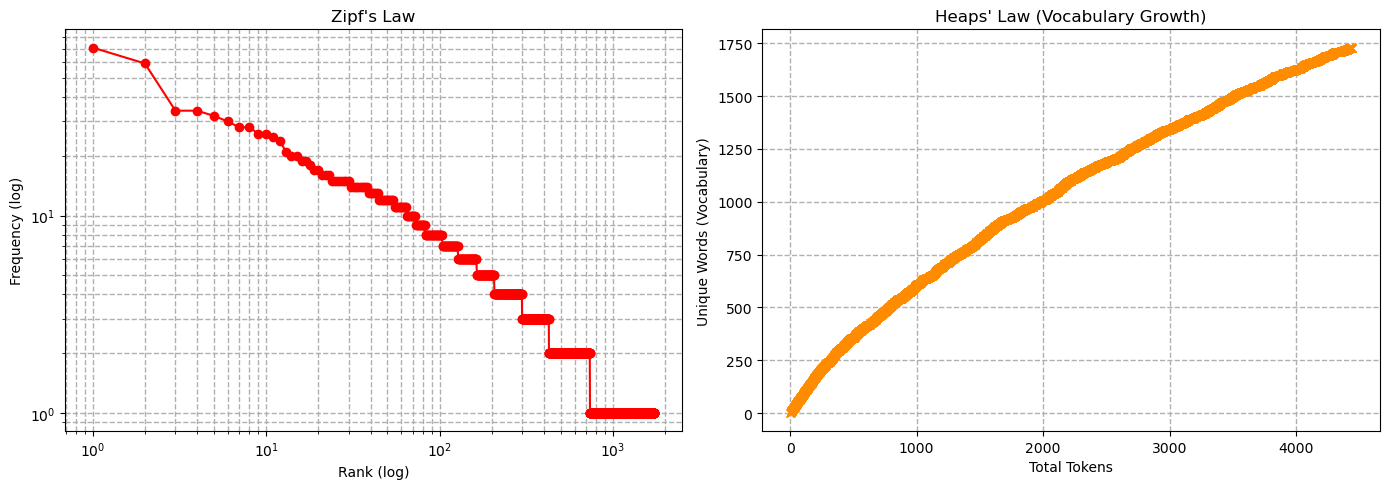

In [12]:
# Zipf’s Law Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].loglog(ranks, freqs, marker='o', color='red')
axs[0].set_title("Zipf's Law")
axs[0].set_xlabel("Rank (log)")
axs[0].set_ylabel("Frequency (log)")
axs[0].grid(True, which='both', linestyle='--', linewidth=1)

# Heaps’ Law Plot
axs[1].plot(token_counts, vocab_size, marker='x', color='darkorange')
axs[1].set_title("Heaps' Law (Vocabulary Growth)")
axs[1].set_xlabel("Total Tokens")
axs[1].set_ylabel("Unique Words (Vocabulary)")
axs[1].grid(True, linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

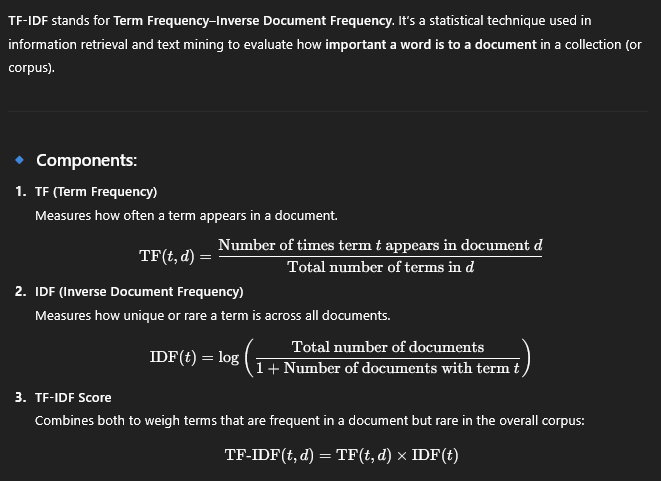

In [13]:
text = " ".join(tokens)

In [14]:
tokens = text.split()

# Group into documents of 10 words each
N = 100
documents = [' '.join(tokens[i:i+N]) for i in range(0, len(tokens), N)]

# Sample output
for i, doc in enumerate(documents[:3], 1):
    print(f"Document {i}: {doc}")

Document 1: studio life life require passion devil willow find new mater white supremacist want everyone see new bird move safe way heal an at way heal health heal he cure child book reserve already ye harris porter porter favorite 3 rd big day may filaria nephew epi ah mr uncle dave love miss choose mon tip cometh inside dy eye ness smoke eye tire lone wrung finish tattoo ink ink love it iii iii thank al were never understand dad left young deep feel device food love life capetown manna epics rest u want 1000 day wast narcosi infinite up make
Document 2: war grind neuro bass lifestyle one world greatest po ing event le man 24 team audit half way west go well good food good life enjoy call garlic bread love ill stand behind gun control pleas senseless shoot take gun comic relief still sad ten ate ate jam the fish burri drawn his food festive food y got limit edit rain shine set today amp love amp hug amp kiss keep baby parent healthcar girl sun have london unit kingdom thought factor b